In [2]:
!pip install rank_bm25

In [3]:
import os
import sys
import psutil
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core import display as ICD
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from rank_bm25 import BM25Okapi, BM25L, BM25Plus
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
%cd "/content/drive/MyDrive/Colab Notebooks/hacknu"

/content/drive/MyDrive/Colab Notebooks/hacknu


In [ ]:
# df1 = pd.read_csv('articles1.csv')
# df2 = pd.read_csv('articles2.csv')
# df3 = pd.read_csv('articles3.csv')
name = 'articles3'
df = pd.read_csv(name + '.csv')
def truncate(txt):
  n = 1000
  a = txt.split()
  if len(a) > 2 * n:
    return ' '.join(a[:n] + a[-n:])
  else:
    return ' '.join(a)
df['content'] = df.content.apply(truncate)
# df = pd.concat([df1, df2, df3])
# df.set_index('id', inplace=True)

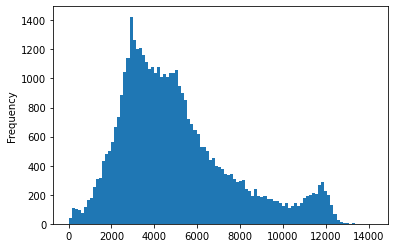

In [16]:
df['content'].apply(len).plot.hist(bins=100)

In [25]:
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer('\w+')

def smart_tokenize(txt):
  if not txt:
    return ['']
  tokens = tokenizer.tokenize(txt.lower())
  # return tokens
  return [lemmatizer.lemmatize(w) for w in tokens]

# df['content2'] = df.apply(lambda row: smart_tokenize(row.content), axis=1)

In [12]:
df1 = pd.read_feather('articles1.f')
df2 = pd.read_feather('articles2.f')
df3 = pd.read_feather('articles3.f')
df = pd.concat([df1, df2, df3])
# df.set_index('id', inplace=True)

In [6]:
import gc
gc.collect()

99

In [14]:
print(df['content2'])

0        [washington, congressional, republican, have, ...
1        [after, the, bullet, shell, get, counted, the,...
2        [when, walt, disney, s, bambi, opened, in, 194...
3        [death, may, be, the, great, equalizer, but, i...
4        [seoul, south, korea, north, korea, s, leader,...
                               ...                        
42566    [uber, driver, keith, avila, picked, up, a, pa...
42567    [crew, on, friday, continued, to, search, lake...
42568    [when, the, obama, administration, announced, ...
42569    [this, story, ha, been, updated, a, new, law, ...
42570    [the, nation, s, first, recreational, marijuan...
Name: content2, Length: 142570, dtype: object


In [24]:
# df['content'] = df.apply(lambda row: ''.join(row.content2), axis=1)
def concat(row):
  a = smart_tokenize(row.title) + smart_tokenize(row.publication) + smart_tokenize(row.author)
  b = row.content2
  # print(len(a), a[0])
  # print(b.shape)
  c = a + b.tolist()
  return ''.join(c)
# df['content'] = df.apply(lambda row: concat(row), axis=1)
df.apply(lambda row: row.content[500:], axis=1)

0        reprogramtoimplodeleavingmillionofpeoplewithou...
1        recinctatthesoutherntipofthebronxainotherpoorm...
2        rrevocableseparationfromhismotherandinthehopeo...
3        stimewashortinthelyricofhisfinalalbumreleasedj...
4        alballisticmissileoricbminhisannualnewyearsday...
                               ...                        
42566    touchingupontheguyavilasaidonfacebookliveminut...
42567    ortgooglemapthreeadultandthreechildwereonthece...
42568    toleaveofficeandthehomeaffordablemodificationp...
42569    hibitslocalordinancefromregulatingtheusedispos...
42570    tatewheremarijuanaislegalthedataonthispointhab...
Length: 142570, dtype: object

In [ ]:
# df.reset_index().to_feather(name + '.f')
# df = pd.read_feather('articles.f')

In [20]:
df.reset_index().to_feather('articles4.f')

In [21]:
df.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,content2
0,0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,houserepublicanfretaboutwinningtheirhealthcare...,"[washington, congressional, republican, have, ..."
1,1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,riftbetweenofficerandresidentakillingpersistin...,"[after, the, bullet, shell, get, counted, the,..."
2,2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,tyruswongbambiartistthwartedbyracialbiasdyat10...,"[when, walt, disney, s, bambi, opened, in, 194..."
3,3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,amongdeathin2016aheavytollinpopmusicthenewyork...,"[death, may, be, the, great, equalizer, but, i..."
4,4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,kimjongunsaynorthkoreaispreparingtotestlongran...,"[seoul, south, korea, north, korea, s, leader,..."
